<a href="https://colab.research.google.com/github/Ksenyff/ICV-2024/blob/main/Assignment_1_Spiridonova_K_O_11_431.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2. Image Representation and Basic Image Processing


In [70]:
import cv2 # библиотека для изображений
import numpy as np
import matplotlib.pyplot as plt # подключение комад из matplotlib

import os
import random

from typing import Tuple

**Task 1. Image Properties and Color Channels**

In [71]:
!wget --user-agent="Mozilla/5.0" https://imgur.com/ZQndAxI.png -O image-traffic.png

--2024-12-08 19:40:13--  https://imgur.com/ZQndAxI.png
Resolving imgur.com (imgur.com)... 199.232.196.193, 199.232.192.193
Connecting to imgur.com (imgur.com)|199.232.196.193|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://i.imgur.com/ZQndAxI.png [following]
--2024-12-08 19:40:13--  https://i.imgur.com/ZQndAxI.png
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1650361 (1.6M) [image/jpeg]
Saving to: ‘image-traffic.png’

image-traffic.png   100%[===================>]   1.57M  --.-KB/s    in 0.07s   

2024-12-08 19:40:13 (21.1 MB/s) - ‘image-traffic.png’ saved [1650361/1650361]



Resolution: (5400, 5400)
Color_depth: 8
Number of channels : 3
Data type: uint8


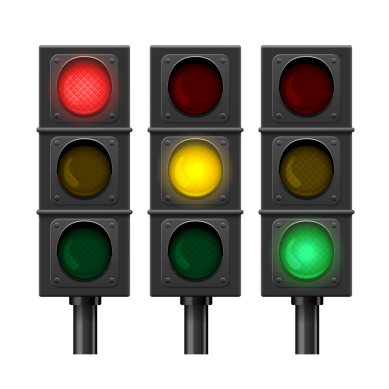

In [72]:
#Вывод цветной картинки
image = cv2.imread('image-traffic.png') #синий и красный поменялись местами
plt.imshow(image)
traffic = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off') # отключение осей
plt.imshow(traffic)
#Вывод разрешение (ширина и высота изображения),
#глубина цвета (битовая глубина на канал),
#количество каналов (обычно 3 для цветного изображения),
#тип данных (тип значений, хранящихся в массиве изображения,).
print(f'Resolution: {traffic.shape[:2]}')# вывод высоты и ширины,без каналов
print(f'Color_depth: {traffic.dtype.itemsize * 8}')
print(f'Number of channels : {traffic.shape[2]}')
print(f'Data type: {traffic.dtype}')

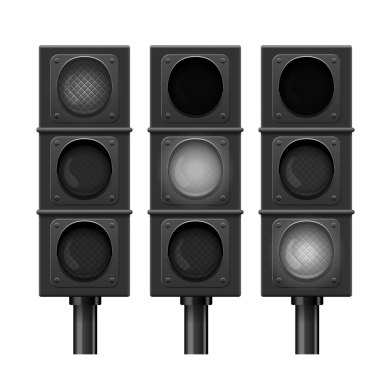

In [73]:
gray_traff = cv2.cvtColor(traffic, cv2.COLOR_BGR2GRAY) # Функция cv2.cvtColor с параметром cv2.COLOR_BGR2GRAY преобразует цветное изображение в черно-белое
plt.imshow(gray_traff, cmap='gray') # в оттенках серого
plt.axis('off')
plt.show()

What is the difference between the color and grayscale images? Is it possible to recover color from the grayscale image?

Ответ:Черно-белое изображение состоит всего из одного канала, поэтому и восставновить цветное изображение очень трудно без особых алгоритмов.

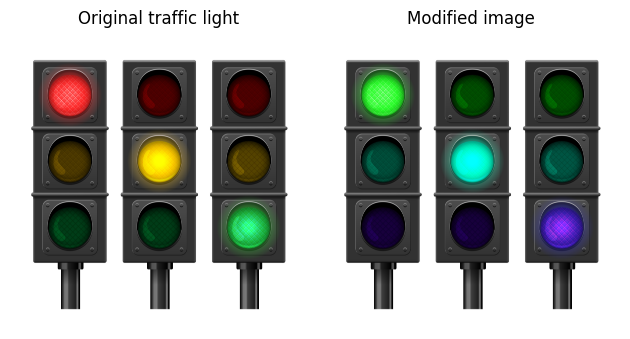

In [74]:
gbr_traff = traffic[...,[2,0,1]]

plt.subplot(1, 2, 1)# расположение 2 изображений в 1 строчку( это первое изображенеи)
plt.imshow(traffic)
plt.axis('off')
plt.title('Original traffic light')

plt.subplot(1, 2, 2)# расположение 2 изображений в 1 строчку( это второе изображенеи)
plt.imshow(gbr_traff)
plt.axis('off')
plt.title('Modified image')

plt.tight_layout()# для эстетики графиков,пхах
plt.show()

What happened to the yellow color? How would you swap the colors of the illuminated traffic lights (e.g., red on the left, yellow in the center, and green on the right)?

Ответ: По заданию меняем цвета :red ⇔ green, green ⇔ blue.Следовательно получаем из RGB - GBR. С учетом того ,что желты это сочетание красного и зеленого, выходит RED=GREEN, GREEN=BLUE => RED+GREEN=GREEN+BLUE=СВЕТЛО ГОЛУБОЙ.

Reflect on how changing resolution, color depth, or file size might impact the performance of a machine vision system, such as in robotics or autonomous vehicles.

Разрешение изображения определяет количество пикселей, которые используются для представления изображения. Высокое разрешение означает большее количество пикселей, что может улучшить детализацию и точность распознавания объектов.Глубина цвета определяет количество бит, используемых для представления цвета каждого пикселя. Большая глубина цвета позволяет представлять большее количество оттенков и цветов.Размер файла изображения зависит от разрешения и глубины цвета.

Всё это дает больше информации об изоражении,но может усложнить обработку, увеличить затрачиваемую память.В робототехнике и автономных транспортных средствах это особенно важно, так как такие системы часто работают в реальном времени и с ограниченными ресурсами.

**Task 2. Generating and Modifying a Binary Image**






[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


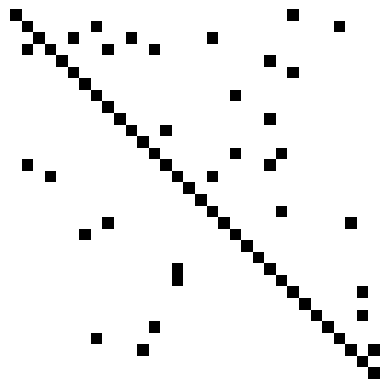

In [89]:
resolution = (32, 32)
binary_image = np.ones(resolution, dtype=np.uint8)
np.fill_diagonal(binary_image, 0)
print(binary_image)

diagonal = np.eye(32, dtype=bool)# Создание маски для главной диагонали

point = 0
while point < 32:
    x = np.random.randint(0, 32)
    y = np.random.randint(0, 32)
    if not diagonal[x, y] and binary_image[x, y] == 1:
        binary_image[x, y] = 0
        point += 1

# Отображение изображения
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

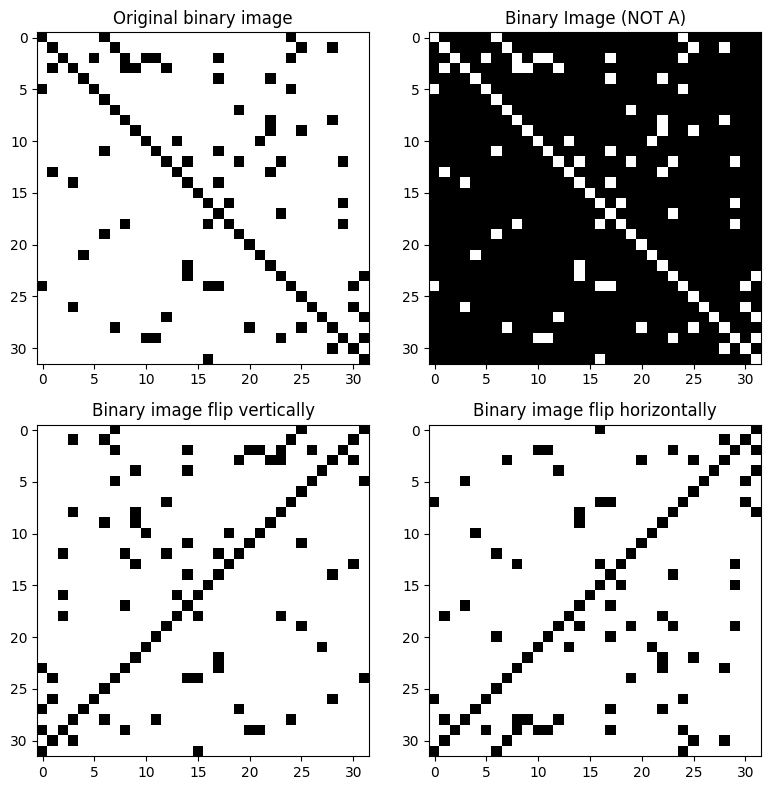

In [100]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original binary image')

plt.subplot(2, 2, 3)
binary_image_flip_ver = np.fliplr(binary_image)
plt.imshow(binary_image_flip_ver, cmap='gray')
plt.title('Binary image flip vertically')

plt.subplot(2, 2, 4)
binary_image_flip_gor = np.flipud(binary_image)
plt.imshow(binary_image_flip_gor, cmap='gray')
plt.title('Binary image flip horizontally')

plt.subplot(2, 2, 2)
binary_image_NOT = cv2.bitwise_not(binary_image)
plt.imshow(binary_image_NOT, cmap='gray')
plt.title('Binary Image (NOT A)')

plt.tight_layout()
plt.show()

In [105]:
binary_image_exported = (binary_image * 255).astype(np.uint8)
cv2.imwrite('binary_image.png', binary_image_exported)
cv2.imwrite('binary_image.jpg', binary_image_exported)

binary_image_flip_ver_exp = (binary_image_flip_ver * 255).astype(np.uint8)
cv2.imwrite('binary_image_flip_ver.png', binary_image_flip_ver_exp)
cv2.imwrite('binary_image_flip_ver.jpg', binary_image_flip_ver_exp)

binary_image_flip_gor_exp = (binary_image_flip_gor * 255).astype(np.uint8)
cv2.imwrite('binary_image_flip_gor.png', binary_image_flip_gor_exp)
cv2.imwrite('binary_image_flip_gor.jpg', binary_image_flip_gor_exp)

binary_image_NOT_exp = (binary_image_NOT * 255).astype(np.uint8)
cv2.imwrite('binary_image_NOT.png', binary_image_NOT_exp)
cv2.imwrite('binary_image_NOT.jpg', binary_image_NOT_exp)

size1 = os.path.getsize('binary_image.png')
size2 = os.path.getsize('binary_image.jpg')
size3 = os.path.getsize('binary_image_flip_ver.png')
size4 = os.path.getsize('binary_image_flip_ver.jpg')
size5 = os.path.getsize('binary_image_flip_gor.png')
size6 = os.path.getsize('binary_image_flip_gor.jpg')
size7 = os.path.getsize('binary_image_NOT.png')
size8 = os.path.getsize('binary_image_NOT.jpg')
print(size1)
print(size2)
print(size3)
print(size4)
print(size5)
print(size6)
print(size7)
print(size8)

243
1327
243
1328
243
1334
255
358


How many different binary images could be generated with this specific rule (see step 1)?

Для изображения размером 32x32 с главной диагональю, установленной в черный цвет, и 32 дополнительными черными пикселями, которые не перекрывают главную диагональ, количество возможных бинарных изображений можно рассчитать следующим образом:

Всего пикселей в изображении: 32 * 32 = 1024.
Пикселей на главной диагонали: 32.
Оставшихся пикселей: 1024 - 32 = 992.
Количество способов выбрать 32 пикселя из 992: C(992, 32), где C(n, k) — биномиальный коэффициент.

How does the specific pattern (main diagonal) change after each modification?
Она всегда постояна